# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns




## 1.1 Loading Data

In [2]:

data = pd.read_csv('preprocessed_data.csv',nrows=50000)
data.shape

y_value_counts = data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding:     ", y_value_counts[1]," -> ",round(y_value_counts[1]/(y_value_counts[1]+y_value_counts[0])*100,2),"%")
print("Number of projects thar are not approved for funding: ", y_value_counts[0]," -> ",round(y_value_counts[0]/(y_value_counts[1]+y_value_counts[0])*100,2),"%")

Number of projects thar are approved for funding:      41993  ->  83.99 %
Number of projects thar are not approved for funding:  8007  ->  16.01 %


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


In [4]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42, stratify=y)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

print("x_train: ",X_train.shape)
print("x_test : ",X_test.shape)
print("x_cv: ",X_cv.shape)

print("y_train: ",y_train.shape)
print("y_test : ",y_test.shape)
print("y_cv : ",y_cv.shape)

x_train:  (22445, 8)
x_test :  (16500, 8)
x_cv:  (11055, 8)
y_train:  (22445,)
y_test :  (16500,)
y_cv :  (11055,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

Bow for essay

In [7]:
vectorizer_essay_bow = CountVectorizer(min_df=10)

vectorizer_essay_bow.fit(X_train['essay'])

X_train_essay_bow = vectorizer_essay_bow.transform(X_train['essay'])
X_cv_essay_bow    = vectorizer_essay_bow.transform(X_cv['essay'])
X_test_essay_bow  = vectorizer_essay_bow.transform(X_test['essay'])

print("Shape of matrix after BOW -> Essays: x_train: ",X_train_essay_bow.shape)
print("Shape of matrix after BOW -> Essays: x_cv   : ",X_cv_essay_bow.shape)
print("Shape of matrix after BOW -> Essays: x_test : ",X_test_essay_bow.shape)

Shape of matrix after BOW -> Essays: x_train:  (22445, 8766)
Shape of matrix after BOW -> Essays: x_cv   :  (11055, 8766)
Shape of matrix after BOW -> Essays: x_test :  (16500, 8766)


TFIDF for essay

In [8]:
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)

vectorizer_essay_tfidf.fit(X_train['essay'])

X_train_essays_tfidf = vectorizer_essay_tfidf.transform(X_train['essay'])
X_cv_essays_tfidf    = vectorizer_essay_tfidf.transform(X_cv['essay'])
X_test_essays_tfidf  = vectorizer_essay_tfidf.transform(X_test['essay'])

print("Shape of matrix after TF-IDF -> Essay: x_train: ",X_train_essays_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_cv   : ",X_cv_essays_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_test : ",X_test_essays_tfidf.shape)

Shape of matrix after TF-IDF -> Essay: x_train:  (22445, 8766)
Shape of matrix after TF-IDF -> Essay: x_cv   :  (11055, 8766)
Shape of matrix after TF-IDF -> Essay: x_test :  (16500, 8766)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [9]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

Schoolstate

In [10]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_state.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


teacher prefix

In [11]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

X_train_teacher_ohe = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_teacher.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names())
print("="*100)

After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


sub category

In [12]:
vectorizer_subcategory = CountVectorizer()
vectorizer_subcategory.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data


X_train_subcategory_ohe = vectorizer_subcategory.transform(X_train['clean_subcategories'].values)
X_cv_subcategory_ohe = vectorizer_subcategory.transform(X_cv['clean_subcategories'].values)
X_test_subcategory_ohe = vectorizer_subcategory.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategory_ohe.shape, y_train.shape)
print(X_cv_subcategory_ohe.shape, y_cv.shape)
print(X_test_subcategory_ohe.shape, y_test.shape)
print(vectorizer_subcategory.get_feature_names())
print("="*100)

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


project_grade_property

In [13]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values)


X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_grade.get_feature_names())
print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


clean categories

In [14]:
vectorizer_clean = CountVectorizer()
vectorizer_clean.fit(X_train['clean_categories'].values)

X_train_clean_ohe = vectorizer_clean.transform(X_train['clean_categories'].values)
X_cv_clean_ohe = vectorizer_clean.transform(X_cv['clean_categories'].values)
X_test_clean_ohe = vectorizer_clean.transform(X_test['clean_categories'].values)


print(vectorizer_clean.get_feature_names())
print("After vectorizations")
print(X_train_clean_ohe.shape, y_train.shape)
print(X_cv_clean_ohe.shape, y_cv.shape)
print(X_test_clean_ohe.shape, y_test.shape)
print(vectorizer_clean.get_feature_names())
print("="*100)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


price

In [15]:
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


teacher_number_of_previously_posted_projects

In [16]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

teacher_previous_proj_normalizer = Normalizer()

teacher_previous_proj_normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))


x_train_teacher_previous_proj_normalized = teacher_previous_proj_normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)
x_test_teacher_previous_proj_normalized  = teacher_previous_proj_normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)
x_cv_teacher_previous_proj_normalized    = teacher_previous_proj_normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)

print("Shape of matrix after normalization -> Teachers Previous Projects: x_train:  ",x_train_teacher_previous_proj_normalized.shape)
print("Shape of matrix after normalization -> Teachers Previous Projects: x_cv   :  ",x_cv_teacher_previous_proj_normalized.shape)
print("Shape of matrix after normalization -> Teachers Previous Projects: x_test :  ",x_test_teacher_previous_proj_normalized.shape)

Shape of matrix after normalization -> Teachers Previous Projects: x_train:   (22445, 1)
Shape of matrix after normalization -> Teachers Previous Projects: x_cv   :   (11055, 1)
Shape of matrix after normalization -> Teachers Previous Projects: x_test :   (16500, 1)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [17]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# MERGING THE FEATURES :set1

In [18]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_train_price_norm = X_train_price_norm.reshape((-1,1))
X_test_price_norm = X_test_price_norm.reshape((-1,1))
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe,X_train_subcategory_ohe, X_train_grade_ohe,X_train_clean_ohe,X_train_price_norm,x_train_teacher_previous_proj_normalized)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe,X_cv_subcategory_ohe, X_cv_grade_ohe,X_cv_clean_ohe, X_cv_price_norm,x_cv_teacher_previous_proj_normalized)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe,X_test_subcategory_ohe, X_test_grade_ohe,X_test_clean_ohe,X_test_price_norm,x_test_teacher_previous_proj_normalized)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 8867) (22445,)
(11055, 8867) (11055,)
(16500, 8867) (16500,)


# SET2:TFIDF

In [19]:
X_set2_train = hstack((X_train_essays_tfidf,X_train_state_ohe, X_train_teacher_ohe,X_train_subcategory_ohe, X_train_grade_ohe,X_train_clean_ohe,X_train_price_norm,x_train_teacher_previous_proj_normalized)).tocsr()
print(X_set2_train.shape, y_train.shape)


(22445, 8867) (22445,)


In [20]:
X_set2_test = hstack((X_test_essays_tfidf,X_test_state_ohe, X_test_teacher_ohe,X_test_subcategory_ohe, X_test_grade_ohe,X_test_clean_ohe,X_test_price_norm,x_test_teacher_previous_proj_normalized)).tocsr()
print(X_set2_test.shape, y_test.shape)

(16500, 8867) (16500,)


In [21]:
X_set2_cv = hstack((X_cv_essays_tfidf,X_cv_state_ohe, X_cv_teacher_ohe,X_cv_subcategory_ohe, X_cv_grade_ohe,X_cv_clean_ohe,X_cv_price_norm,x_cv_teacher_previous_proj_normalized)).tocsr()
print(X_set2_cv.shape, y_cv.shape)

(11055, 8867) (11055,)


# Applying NB for SET1

In [22]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

  
 

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 17.22it/s]


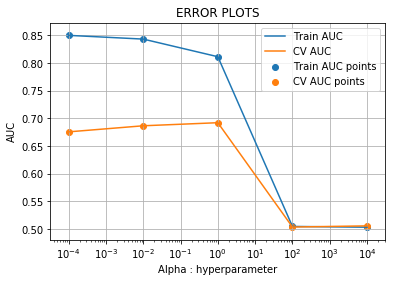

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import math as mt

train_auc = []
cv_auc = []

lambdas = [10**-4,10**-2,10**0,10**2,10**4] 
log_lambda=[]
for i in lambdas:
    log_lambda.append(mt.log10(i))

for i in tqdm(lambdas):
    neigh = MultinomialNB(alpha=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
plt.xscale('log')
plt.plot(lambdas, train_auc, label='Train AUC')
plt.plot(lambdas, cv_auc, label='CV AUC')

plt.scatter(lambdas, train_auc, label='Train AUC points')
plt.scatter(lambdas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [31]:
best_alpha = 1

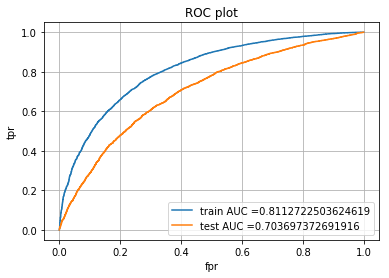

In [32]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
neigh = MultinomialNB(alpha=best_alpha)
neigh.fit(X_tr, y_train)
y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC plot")
plt.grid()
plt.show()

In [33]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.5458271176811295 for threshold 0.796
Train confusion matrix
[[ 2633   962]
 [ 4802 14048]]
Train heated map for confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


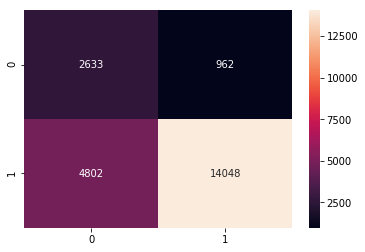

In [34]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
d=pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Train heated map for confusion matrix:")
print(sns.heatmap(d,fmt='1d',annot=True))


Test confusion matrix
[[1563 1079]
 [3960 9898]]
Test heated map for confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


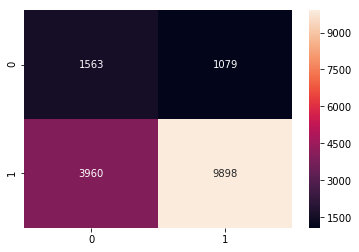

In [35]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
d=pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print("Test heated map for confusion matrix:")
print(sns.heatmap(d,fmt='1d',annot=True))

# Applying NB for SET2

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.77it/s]


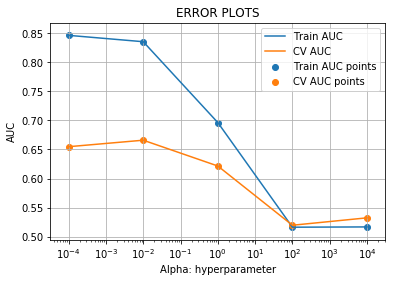

In [36]:
train_auc_set2 = []
cv_auc_set2 = []

lambdas = [10**-4,10**-2,10**0,10**2,10**4] 
log_lambda=[]
for i in lambdas:
    log_lambda.append(mt.log10(i))
    
for i in tqdm(lambdas):
    neigh = MultinomialNB(alpha=i)
    neigh.fit(X_set2_train, y_train)

    y_train_pred = batch_predict(neigh, X_set2_train)    
    y_cv_pred = batch_predict(neigh, X_set2_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_set2.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_set2.append(roc_auc_score(y_cv, y_cv_pred))
plt.xscale('log')
plt.plot(lambdas, train_auc_set2, label='Train AUC')
plt.plot(lambdas, cv_auc_set2, label='CV AUC')

plt.scatter(lambdas, train_auc_set2, label='Train AUC points')
plt.scatter(lambdas, cv_auc_set2, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

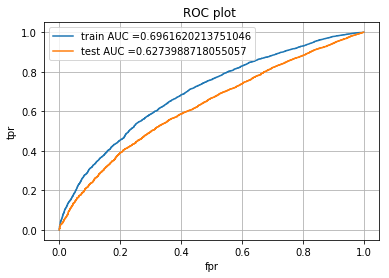

In [37]:
best_k =1 # by looking at the graph 

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
neigh = MultinomialNB(alpha=best_k)
neigh.fit(X_set2_train, y_train)
y_train_pred = batch_predict(neigh, X_set2_train)    
y_test_pred = batch_predict(neigh, X_set2_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC plot ")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.41461818101326997 for threshold 0.895
Train confusion matrix
[[ 2294  1301]
 [ 6602 12248]]
Train heated map for confusion matrix:
AxesSubplot(0.241667,0.125;0.503333x0.755)


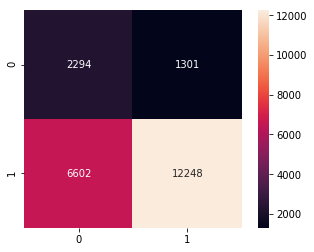

In [38]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
data=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print("Train heated map for confusion matrix:")
print(sns.heatmap(data,annot=True,fmt='d',square=True))

Test confusion matrix
[[1427 1215]
 [5114 8744]]
Test heated map for confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


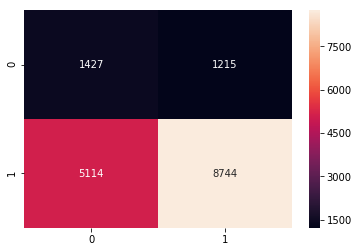

In [39]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
data=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Test heated map for confusion matrix:")
print(sns.heatmap(data,annot=True,fmt='d'))

# top 20 features from set1

In [40]:
bow_features_names1 = []

In [41]:
for i in vectorizer_essay_bow.get_feature_names() :
    bow_features_names1.append(i)

for i in vectorizer_state.get_feature_names() :
    bow_features_names1.append(i)

for i in vectorizer_teacher.get_feature_names() :
    bow_features_names1.append(i)

for i in vectorizer_grade.get_feature_names() :
    bow_features_names1.append(i)

for i in vectorizer_clean.get_feature_names() :
    bow_features_names1.append(i)

In [42]:
bow_features_names1.append("price")
bow_features_names1.append("teacher_number_of_previously_posted_projects")

In [43]:
totalFeatureNamesBow=len(bow_features_names1)

In [44]:
nb_bow = MultinomialNB(alpha = 0.001,class_prior=[0.5,0.5])

nb_bow.fit(X_tr, y_train)

MultinomialNB(alpha=0.001, class_prior=[0.5, 0.5], fit_prior=True)

In [45]:
bow_features_probs = {}
for a in range(totalFeatureNamesBow) :

    bow_features_probs[a] = nb_bow.feature_log_prob_[0,a]

In [46]:
final_bow_features = pd.DataFrame({'feature_prob_estimates' : list(bow_features_probs.values()),
'feature_names' : list(bow_features_names1)})

In [47]:
a = final_bow_features.sort_values(by = ['feature_prob_estimates'], ascending = False)

In [48]:
print("TOP 20 Positive features")
a.head(20)

TOP 20 Positive features


,feature_prob_estimates,feature_names
7591,-3.042942,students
6893,-4.149155,school
4568,-4.453945,learning
5194,-4.505447,my
1469,-4.569522,classroom
5329,-4.766821,not
4564,-4.796612,learn
3755,-4.841571,help
7878,-4.845961,the
7905,-4.861228,they


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [49]:
from prettytable import PrettyTable 
tb = PrettyTable()
tb.field_names= (" Vectorizer  ", "  Model  ", "  Hyperparameter  ","  AUC  ")
tb.add_row(["   BoW","Brute" , 1 ,0.706]) 
tb.add_row(["  TfIdf", "Brute", 1, 0.62]) 
print(tb.get_string(titles = "MultinomialNB- Observations")) 


+---------------+-----------+--------------------+---------+
|  Vectorizer   |   Model   |   Hyperparameter   |   AUC   |
+---------------+-----------+--------------------+---------+
|        BoW    |   Brute   |         1          |  0.706  |
|      TfIdf    |   Brute   |         1          |   0.62  |
+---------------+-----------+--------------------+---------+
